The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


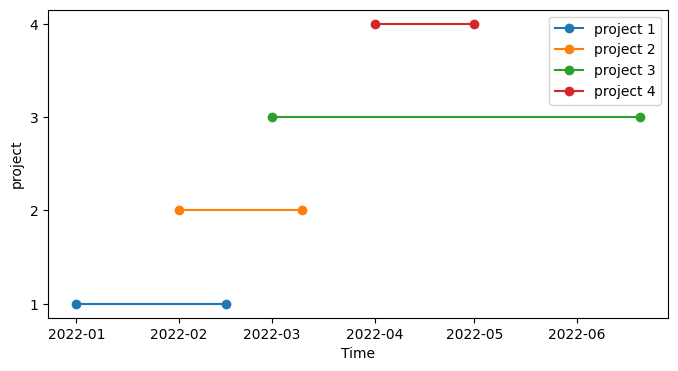

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data representing project subscription data for only 4 projects
data = {
    'project_id': ['1', '2', '3', '4'],
    'subscription_start_date': ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'],
    'cancellation_date': ['2022-02-15', '2022-03-10', '2022-06-20', '2022-05-01']  # No NaT
}

df = pd.DataFrame(data)
df['subscription_start_date'] = pd.to_datetime(df['subscription_start_date'])
df['cancellation_date'] = pd.to_datetime(df['cancellation_date'])

# Set the observation period to 30 days
observation_period = 30

# Calculate the duration until cancellation or end of the observation period
df['duration'] = (df['cancellation_date'] - df['subscription_start_date']).dt.days.fillna(observation_period)

# Create a line graph
plt.figure(figsize=(8, 4))
for index, row in df.iterrows():
    # Create an array of project IDs for plotting
    project_ids = np.full_like(row[['subscription_start_date', 'cancellation_date']].values, row['project_id'])
    # Plot the line
    plt.plot(row[['subscription_start_date', 'cancellation_date']].values, project_ids, label=f'project {row["project_id"]}', marker='o')

# plt.title('project Subscription and Cancellation')
plt.xlabel('Time')
plt.ylabel('project')
plt.legend()
# plt.savefig('img/cus_sub_cancel.png')
plt.savefig('img/cus_sub_cancel.eps', format='eps')

plt.show()


In [2]:
import pandas as pd
from lifelines import KaplanMeierFitter

# Provided data
data = {
    'project_id': [1, 2, 3, 4],
    'subscription_start_date': ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'],
    'cancellation_date': ['2022-02-15', '2022-03-10', '2022-06-20', '2022-05-01']
}

df = pd.DataFrame(data)
df['subscription_start_date'] = pd.to_datetime(df['subscription_start_date'])
df['cancellation_date'] = pd.to_datetime(df['cancellation_date'])

# Calculate the duration until cancellation or end of the observation period
df['duration'] = (df['cancellation_date'] - df['subscription_start_date']).dt.days.fillna(30)  # 30 days for projects who haven't canceled

# Create a Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Fit the data to the estimator
kmf.fit(durations=df['duration'], event_observed=(df['cancellation_date'].notnull()))

# Display the Kaplan-Meier survival function
print(kmf.survival_function_)


          KM_estimate
timeline             
0.0              1.00
30.0             0.75
37.0             0.50
45.0             0.25
111.0            0.00


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


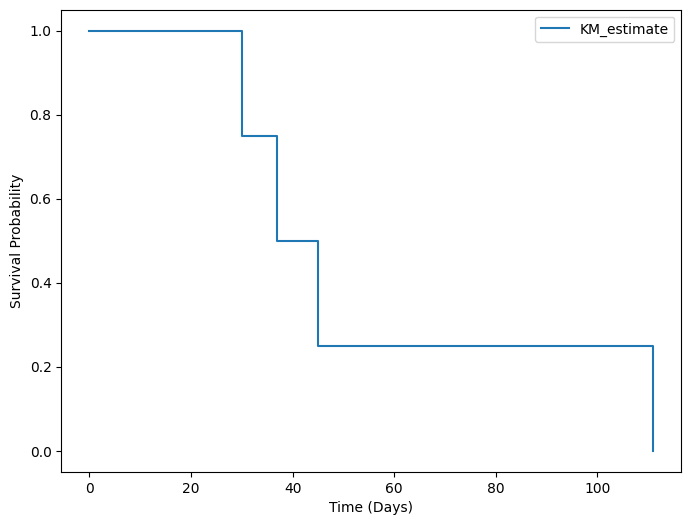

In [3]:
# Plot the survival function
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
kmf.plot_survival_function(ci_show=False)
# plt.title('Survival Function - project Churn')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Probability')
plt.savefig('img/KM_example.eps', format='eps')
plt.show()

In [27]:
# import pandas as pd
# from lifelines import KaplanMeierFitter

# # Sample data representing project subscription data for only 4 projects
# data = {
#     'project_id': [1, 2, 3, 4],
#     'subscription_start_date': ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'],
#     'cancellation_date': ['2022-02-15', '2022-03-10', '2022-06-20', None]
# }

# df = pd.DataFrame(data)
# df['subscription_start_date'] = pd.to_datetime(df['subscription_start_date'])
# df['cancellation_date'] = pd.to_datetime(df['cancellation_date'])

# # Calculate the duration until cancellation or end of the observation period
# df['duration'] = (df['cancellation_date'] - df['subscription_start_date']).dt.days.fillna(365)  # 365 days for projects who haven't canceled

# # Create a Kaplan-Meier estimator
# kmf = KaplanMeierFitter()

# # Fit the data to the estimator
# kmf.fit(durations=df['duration'], event_observed=(df['cancellation_date'].notnull()))

# # Plot the survival function
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# kmf.plot_survival_function(ci_show=False)
# plt.title('Survival Function - project Churn')
# plt.xlabel('Time (Days)')
# plt.ylabel('Survival Probability')
# plt.show()
